In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [97]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\2020-04-20-2023-04-20.csv"
df = pd.read_csv(file)

In [98]:
df

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,GNB328,14 April 2023,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Guinea-Bissau),Military Forces of Guinea (2021-),6,...,Bissau,11.8726,-15.5885,1,Agencia de Noticias da Guine; O Democrata,National,"On 14 April 2023, Brigadiers (assumed military...",0,crowd size=no report,1681739330
1,KEN11403,14 April 2023,2023,2,Political violence,Riots,Mob violence,Rioters (Kenya),Vigilante Group (Kenya),5,...,Ikerege,-1.2000,34.5500,2,Opera News (Kenya),National,"Around 14 April 2023 (as reported), a mob corn...",2,crowd size=no report,1681739330
2,KEN11406,14 April 2023,2023,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Kenya (2022-),NaN,1,...,Maralal,1.0968,36.6980,2,Daily Nation (Kenya); NTV (Kenya); Star (Kenya),New media-National,"Weapons seizure: On 14 April 2023, police seiz...",0,NaN,1681739330
3,SAF18908,14 April 2023,2023,2,Political violence,Riots,Mob violence,Rioters (South Africa),Vigilante Group (South Africa),5,...,Cape Town - Gugulethu,-33.9833,18.5667,1,Daily News (South Africa),National,"Around 14 April 2023 (as reported), a mob assa...",1,crowd size=no report,1681739331
4,SAF18909,14 April 2023,2023,2,Demonstrations,Protests,Peaceful protest,Protesters (South Africa),Government of South Africa (1994-); Students (...,6,...,Kimberley,-28.7333,24.7667,1,SABC News,National,"Around 14 April 2023 (as reported), the Deputy...",0,crowd size=no report,1681739331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860326,UKR36142,20 April 2020,2020,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,1,...,Dokuchaevsk,47.7492,37.6777,2,DPR Armed Forces Press Service,Other,"On 20 April 2020, the Ukrainian Forces fired I...",0,NaN,1680636698
860327,UKR36143,20 April 2020,2020,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,1,...,Zhabichevo,48.0617,37.6975,2,DPR Armed Forces Press Service,Other,"On 20 April 2020, the Ukrainian Forces fired 8...",0,NaN,1680636698
860328,UKR36144,20 April 2020,2020,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,1,...,Shakhta Trudovskaya,47.9512,37.5492,2,DPR Armed Forces Press Service,Other,"On 20 April 2020, the Ukrainian Forces fired g...",0,NaN,1680636698
860329,UKR36145,20 April 2020,2020,1,Political violence,Battles,Armed clash,Military Forces of Ukraine (2019-),NaN,1,...,Donetsk - Donetsk Airport,48.0712,37.7407,2,DPR Armed Forces Press Service,Other,"On 20 April 2020, the Ukrainian Forces fired g...",0,NaN,1680636698


In [99]:
#conta il numero di eventi totali, non fatalità
ev = df.groupby(["event_type"])["fatalities"].count()
ev.sort_values(ascending=False)

event_type
Protests                      450744
Explosions/Remote violence    106858
Battles                       104504
Violence against civilians     89637
Strategic developments         54913
Riots                          53675
Name: fatalities, dtype: int64

In [100]:
#conta il numero di eventi nelle regioni, non fatalità
reg = df.groupby(["region"])["fatalities"].count()
reg.sort_values(ascending=False)

region
Europe                       184157
Middle East                  139966
South Asia                    99142
North America                 97830
South America                 91177
Southeast Asia                51471
Caucasus and Central Asia     33957
Western Africa                31520
East Asia                     30615
Eastern Africa                28132
Northern Africa               20452
Middle Africa                 19149
Central America               13481
Caribbean                      8523
Southern Africa                7689
Oceania                        3063
Antarctica                        7
Name: fatalities, dtype: int64

In [65]:
event = df.groupby(["event_type"])["fatalities"].count()

In [130]:
df2=df.groupby(["region"])["fatalities"].count()
df2=df2.sort_values(ascending=False)
order=df2.index.tolist()

order.remove("Antarctica")
order.remove("Caribbean")
order1=['Europe',
 'Middle\n East',
 'South\n Asia',
 'North\n America',
 'South\n America',
 'Southeast\n Asia',
 'Caucasus\n and Central\n Asia',
 'Western\n Africa',
 'East\n Asia',
 'Eastern\n Africa',
 'Northern\n Africa',
 'Middle\n Africa',
 'Central\n America',
 'Southern\n Africa',
 'Oceania']

In [189]:
lis=event.index.tolist()
lis.remove("Protests")

In [175]:
df1.loc[order].index

Index(['Europe', 'Middle East', 'South Asia', 'North America', 'South America',
       'Southeast Asia', 'Caucasus and Central Asia', 'Western Africa',
       'East Asia', 'Eastern Africa', 'Northern Africa', 'Middle Africa',
       'Central America', 'Southern Africa', 'Oceania'],
      dtype='object', name='region')

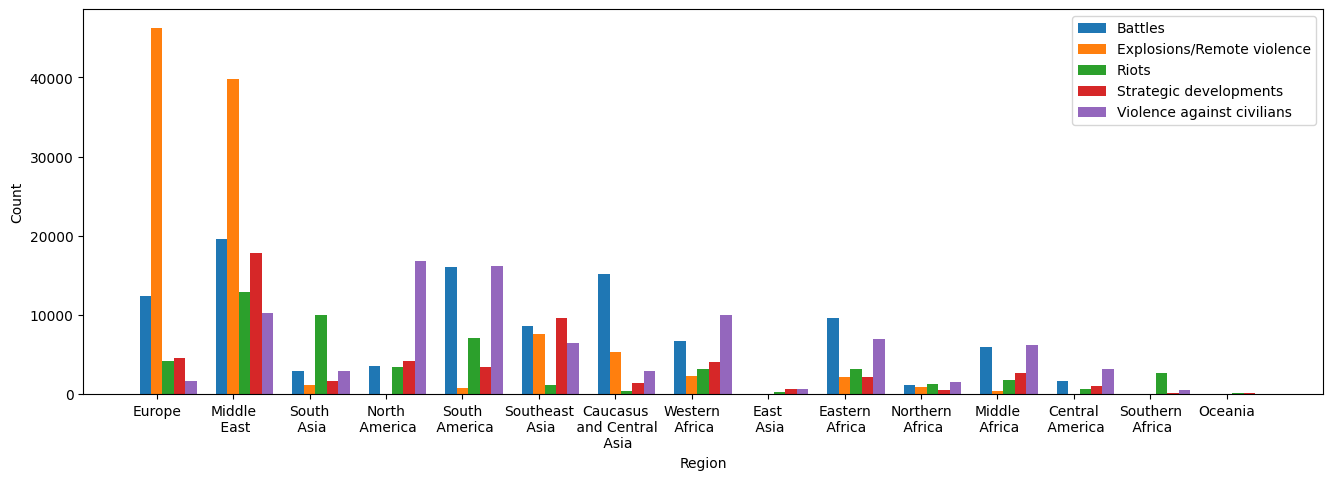

In [213]:
x = np.arange(15)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(figsize=(16,5))
for eve in lis:
    offset=width*multiplier
    df1 = df[["region","fatalities"]]
    df1 = df1.loc[df["event_type"] == eve]
    df1 = df1.groupby(["region"])["region"].count()
    rect = ax.bar(x + offset,df1.loc[order], width, label=eve)
    multiplier += 1
plt.legend()

#plt.xticks(ticks=np.arange(15),labels=order1)
ax.set_xticks(x + width, order1)
plt.ylabel("Count")
plt.xlabel("Region")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (17,) and arg 1 with shape (22,).

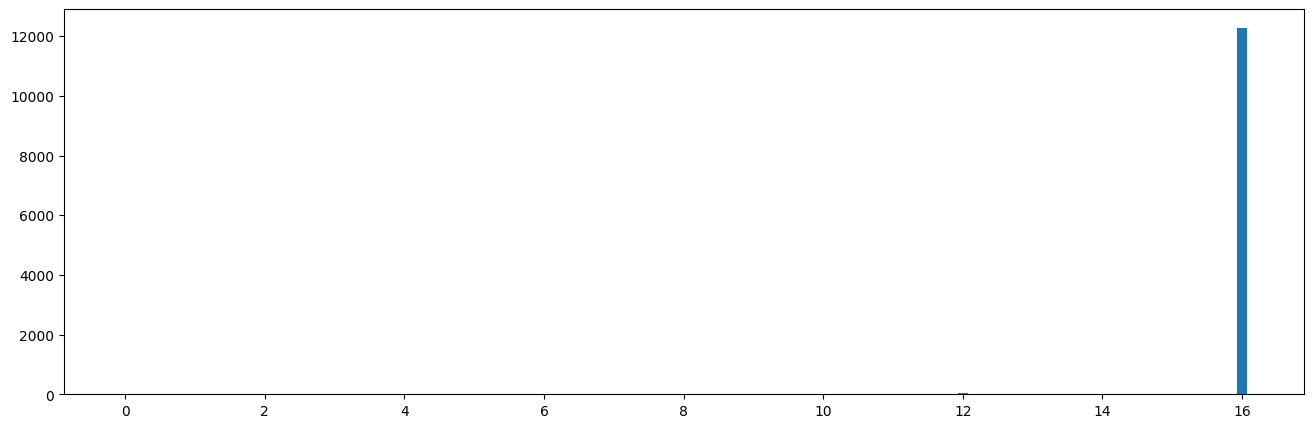

In [214]:
dfc=df.loc[df["region"] == "Europe"]
x = np.arange(17)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(figsize=(16,5))
for eve in lis:
    offset=width*multiplier
    df1 = dfc[["country","fatalities"]]
    df1 = df1.loc[df["event_type"] == eve]
    df1 = df1.groupby(["country"])["country"].count()
    rect = ax.bar(x + offset,df1.loc[df1.index.tolist()], width, label=eve)
    multiplier += 1
plt.legend()

#plt.xticks(ticks=np.arange(15),labels=order1)
ax.set_xticks(x + width, df1.index.tolist())
plt.ylabel("Count")
plt.xlabel("Region")
plt.show()

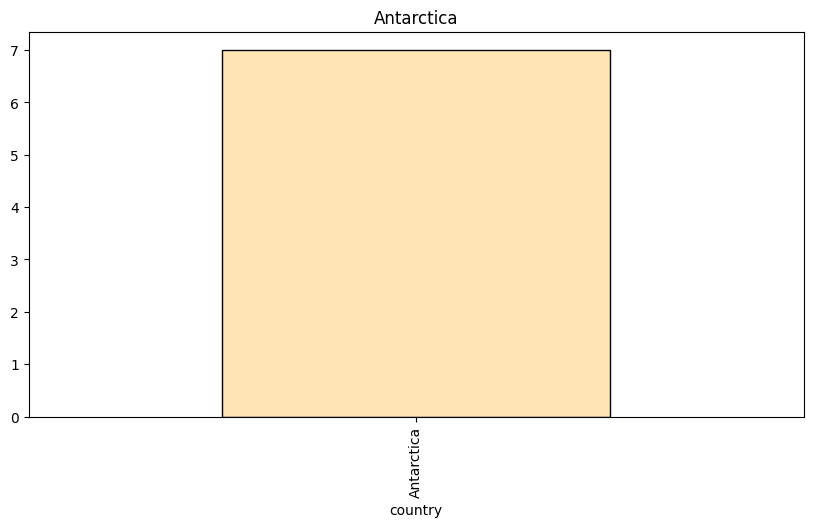

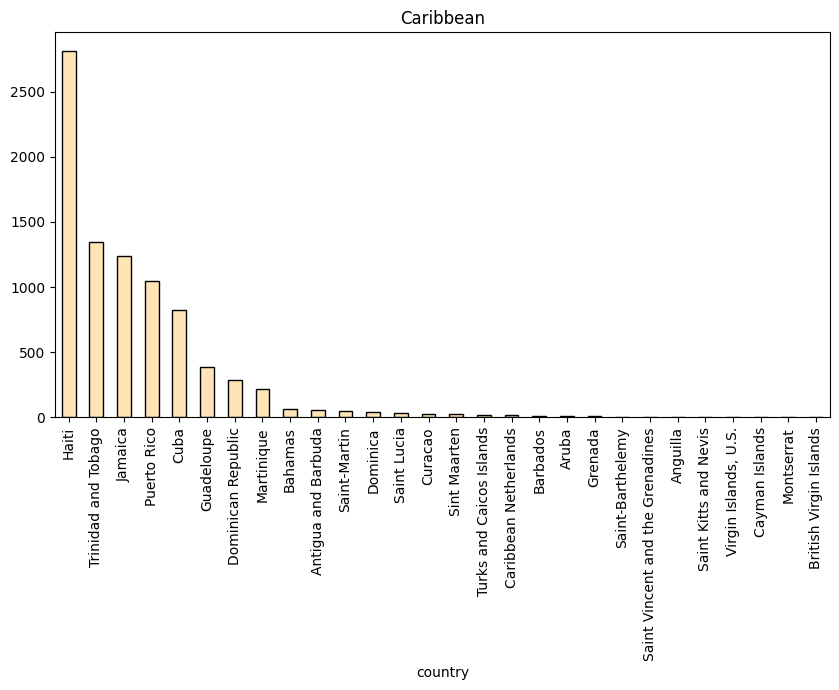

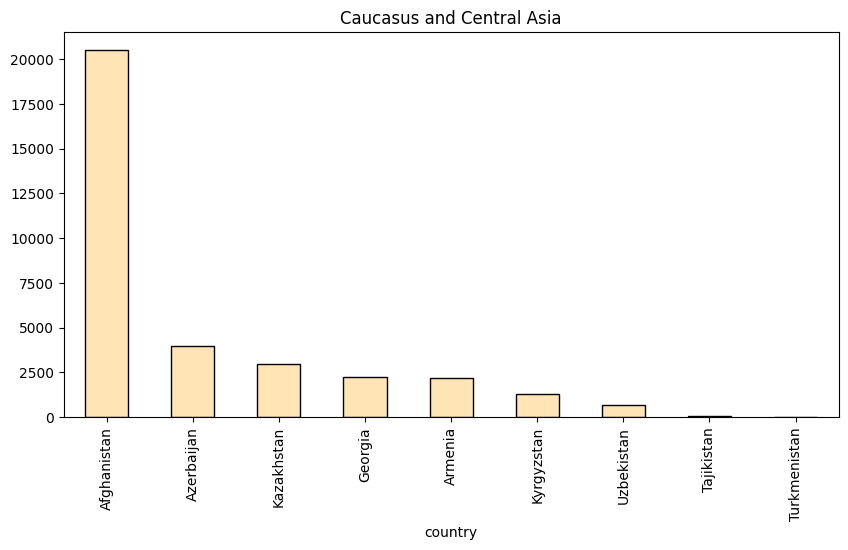

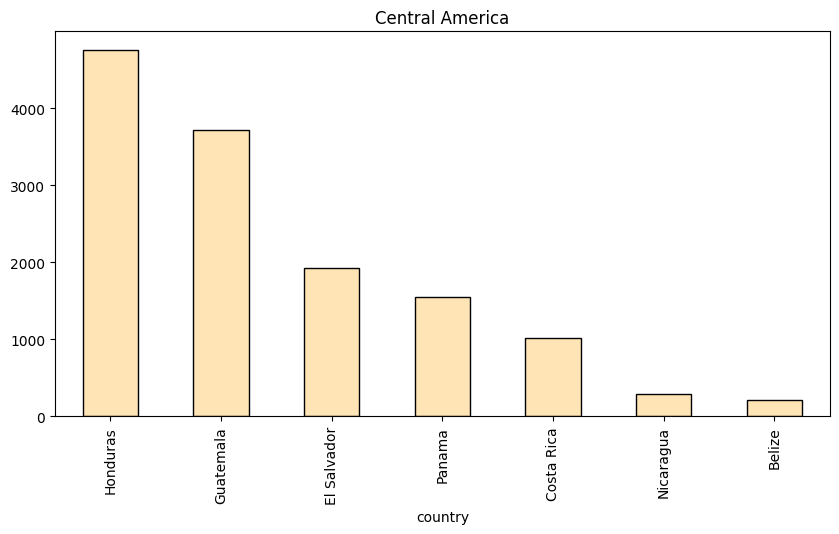

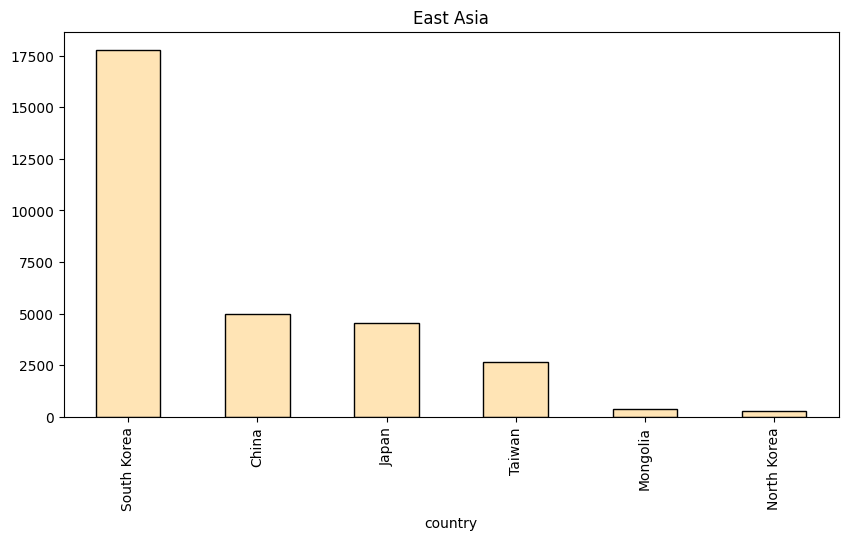

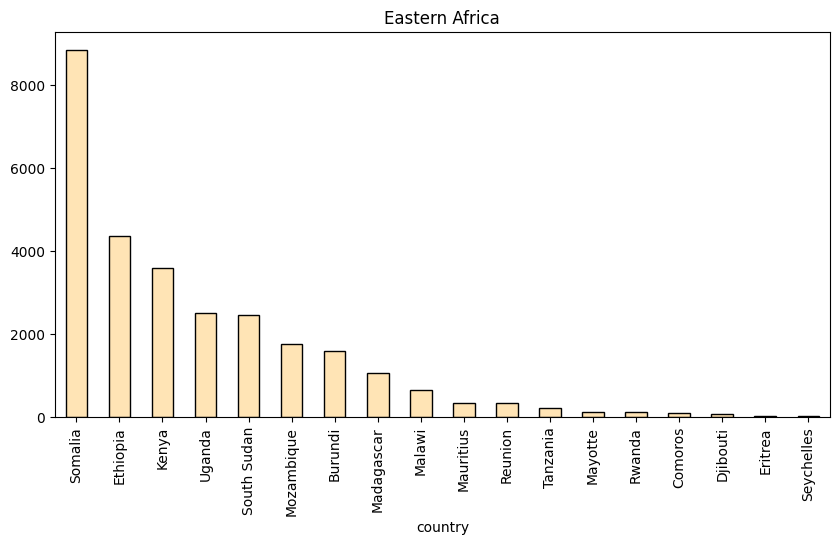

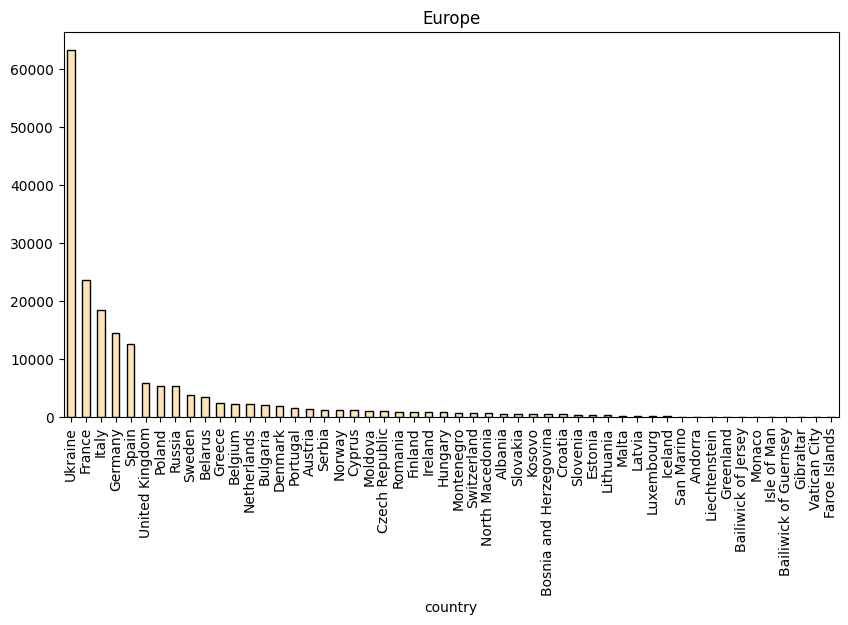

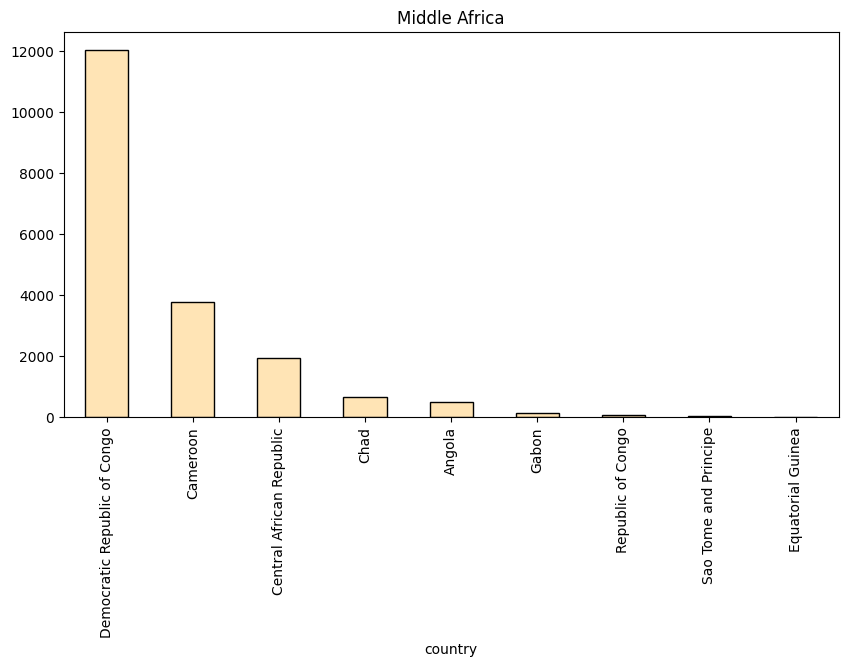

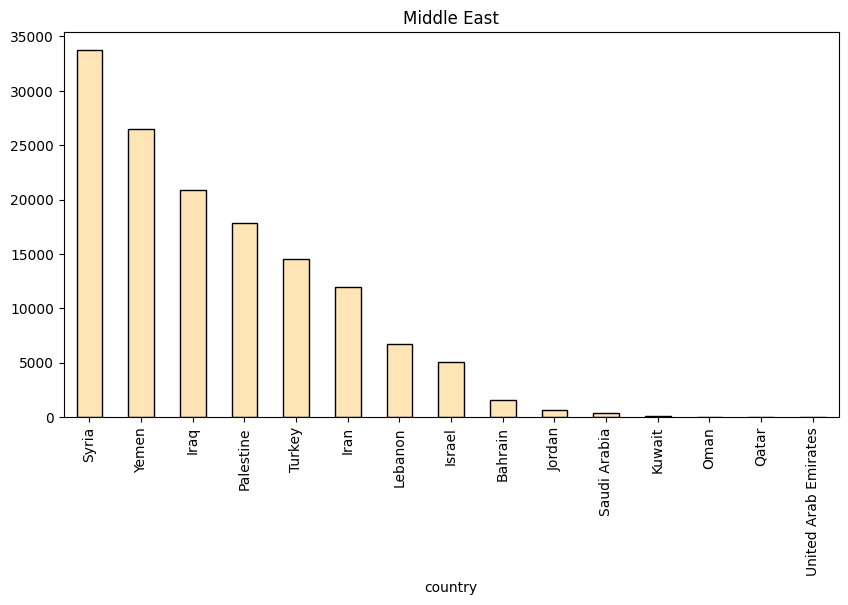

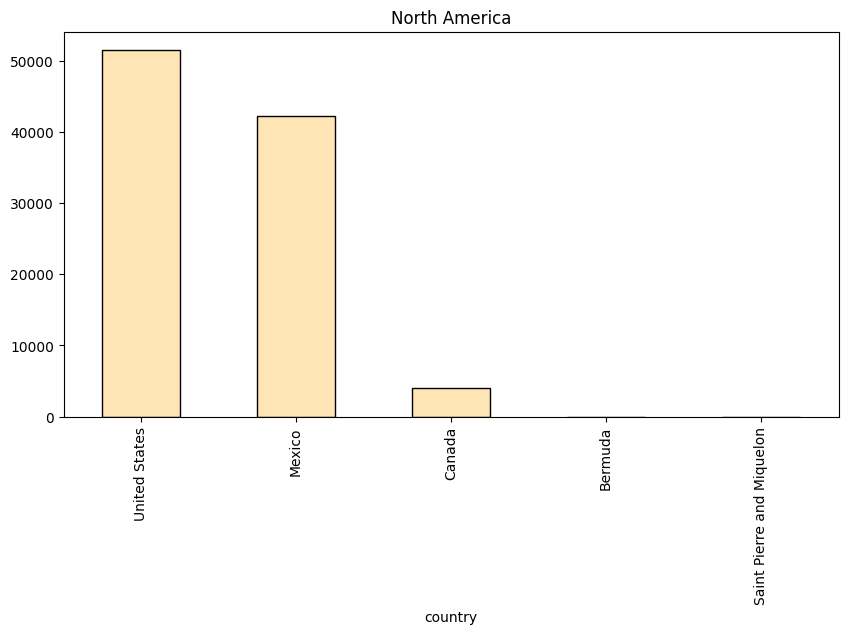

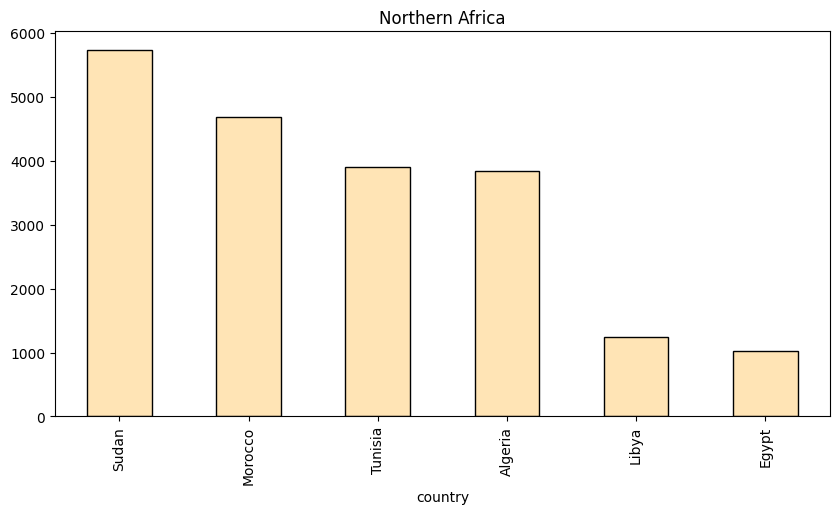

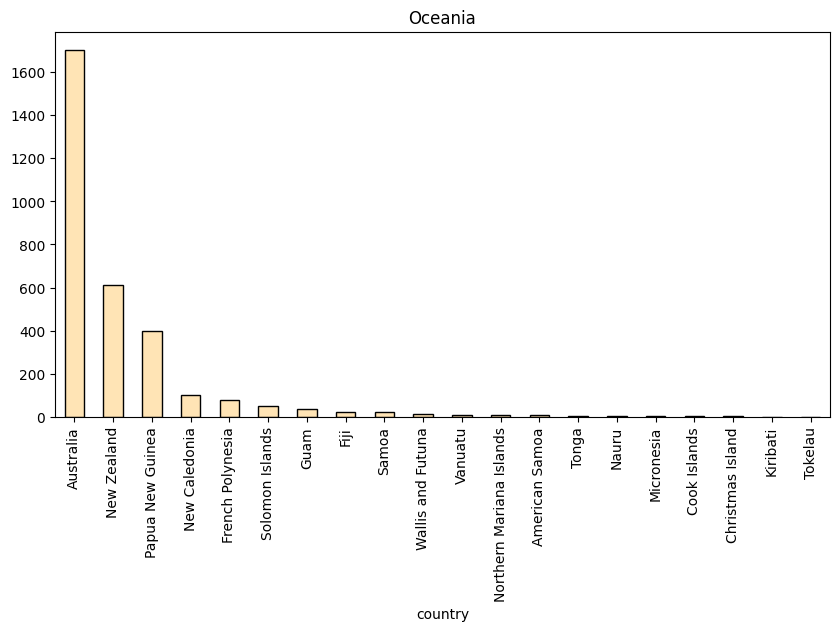

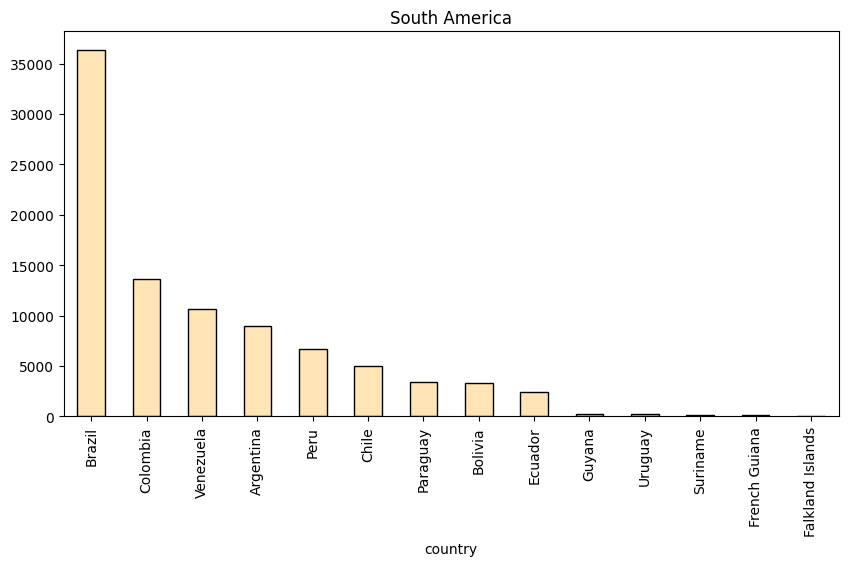

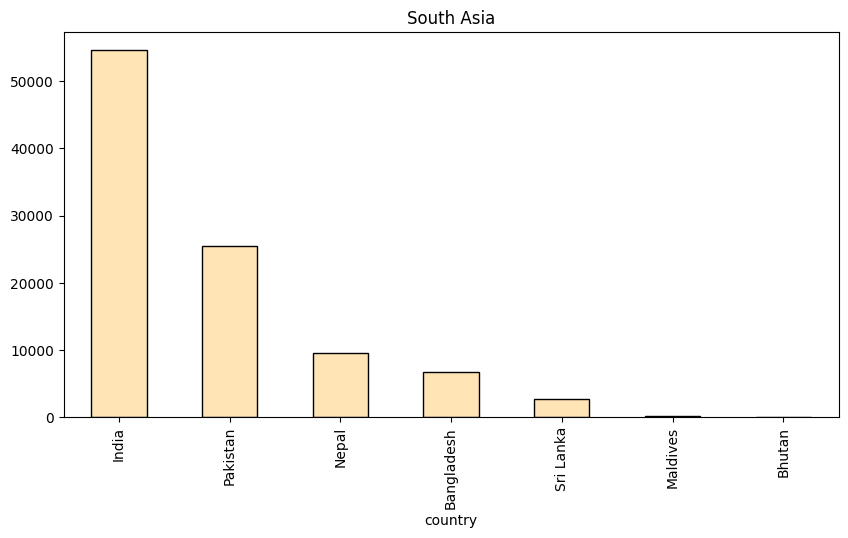

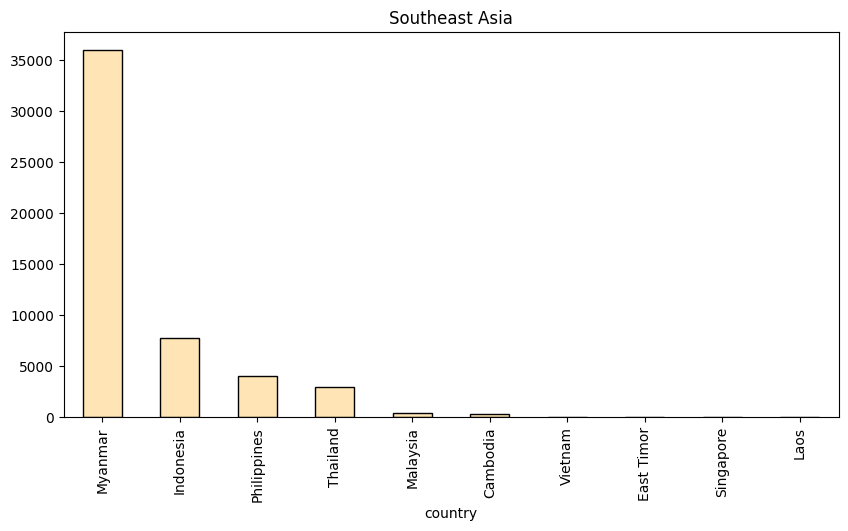

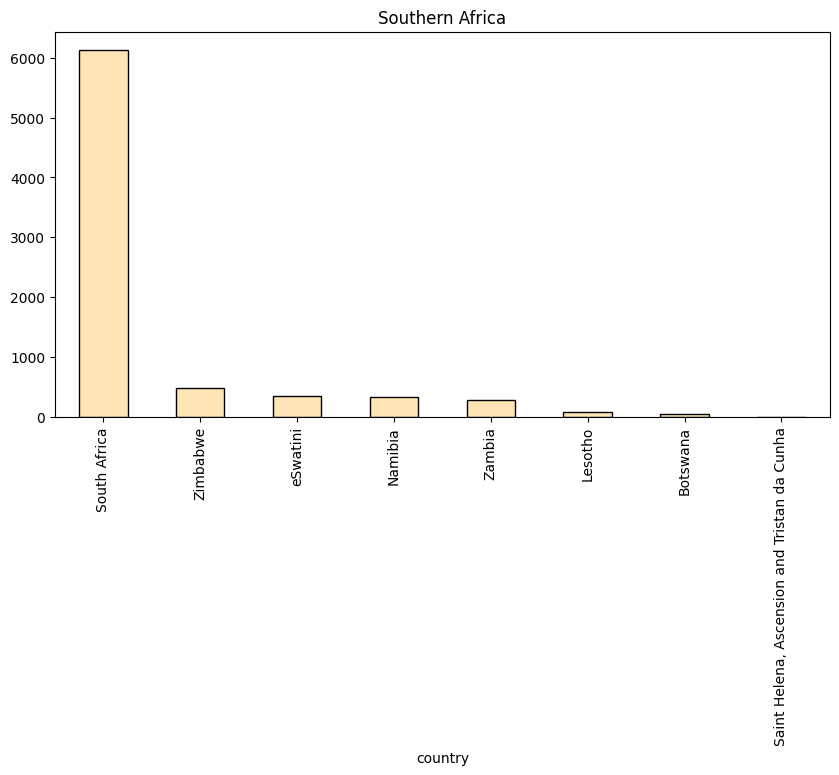

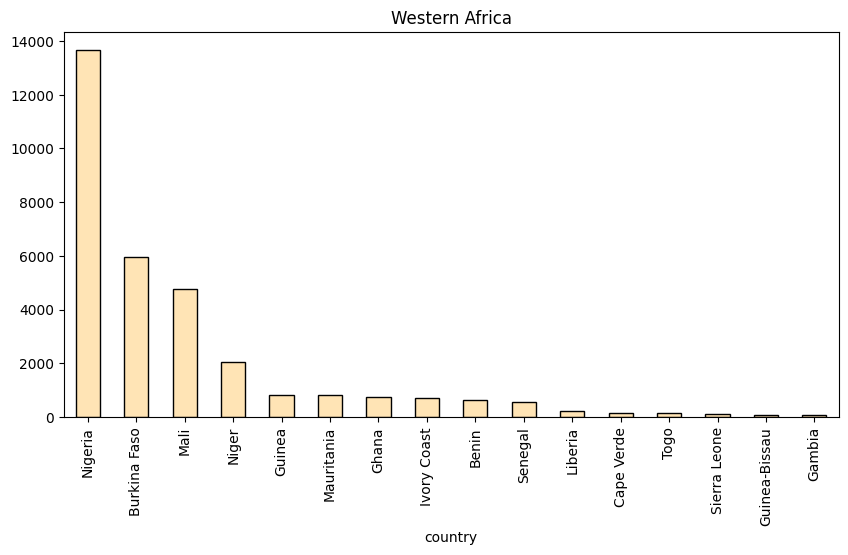

In [132]:
for region in reg.index.tolist():
    df1 = df[["country","fatalities"]]
    df1 = df1.loc[df["region"] == region]
    df1 = df1.groupby(["country"])["country"].count()
    df1 = df1.sort_values(ascending=False)
    df1.plot(kind='bar', y=1, title=region, figsize=(10,5), color='moccasin', edgecolor='k', legend=False)
    #plt.tight_layout()
    plt.show()

In [62]:
for region in reg.index.tolist():
    df1 = df.loc[df["region"] == region]
    print(region)
    df2=df1.groupby(["disorder_type","event_type"])["event_id_cnty"].count().to_frame()
    #df2.sort_values(ascending=False)
    display(df2)
    dfi.export(df2,"events_%s.png" %region)
    print("\n")

Antarctica


,,event_id_cnty
disorder_type,event_type,
Demonstrations,Protests,7


C:\Program Files\Google\Chrome\Application\chrome.exe


Caribbean


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             2592
                                   Riots                                 960
Political violence                 Battles                              1092
                                   Riots                                 200
                                   Violence against civilians           2947
Political violence; Demonstrations Protests                               24
Strategic developments             Strategic developments                708

C:\Program Files\Google\Chrome\Application\chrome.exe


Caucasus and Central Asia


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             8561
                                   Riots                                 198
Political violence                 Battles                             15160
                                   Explosions/Remote violence           5388
                                   Riots                                 225
                                   Violence against civilians           2960
Political violence; Demonstrations Protests                               28
Strategic developments             Strategic developments               1437

C:\Program Files\Google\Chrome\Application\chrome.exe


Central America


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             6973
                                   Riots                                 380
Political violence                 Battles                              1630
                                   Explosions/Remote violence              3
                                   Riots                                 232
                                   Violence against civilians           3217
Political violence; Demonstrations Protests                                8
Strategic developments             Strategic developments               1038

C:\Program Files\Google\Chrome\Application\chrome.exe


East Asia


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                            28924
                                   Riots                                 230
Political violence                 Battles                                 5
                                   Explosions/Remote violence              4
                                   Riots                                  41
                                   Violence against civilians            713
Political violence; Demonstrations Protests                                3
Strategic developments             Strategic developments                695

C:\Program Files\Google\Chrome\Application\chrome.exe


Eastern Africa


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             3798
                                   Riots                                 851
Political violence                 Battles                              9681
                                   Explosions/Remote violence           2169
                                   Riots                                2328
                                   Violence against civilians           6996
Political violence; Demonstrations Protests                              120
Strategic developments             Strategic developments               2189

C:\Program Files\Google\Chrome\Application\chrome.exe


Europe


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                           114979
                                   Riots                                2406
Political violence                 Battles                             12368
                                   Explosions/Remote violence          46283
                                   Riots                                1780
                                   Violence against civilians           1664
Political violence; Demonstrations Protests                               94
Strategic developments             Strategic developments               4583

C:\Program Files\Google\Chrome\Application\chrome.exe


Middle Africa


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             2115
                                   Riots                                 633
Political violence                 Battles                              5912
                                   Explosions/Remote violence            367
                                   Riots                                1128
                                   Violence against civilians           6251
Political violence; Demonstrations Protests                               68
Strategic developments             Strategic developments               2675

C:\Program Files\Google\Chrome\Application\chrome.exe


Middle East


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                            39360
                                   Riots                                4656
Political violence                 Battles                             19549
                                   Explosions/Remote violence          39739
                                   Riots                                8317
                                   Violence against civilians          10228
Political violence; Demonstrations Protests                              311
Strategic developments             Strategic developments              17806

C:\Program Files\Google\Chrome\Application\chrome.exe


North America


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                            69486
                                   Riots                                1944
Political violence                 Battles                              3571
                                   Explosions/Remote violence             57
                                   Riots                                1543
                                   Violence against civilians          16831
Political violence; Demonstrations Protests                              172
Strategic developments             Strategic developments               4226

C:\Program Files\Google\Chrome\Application\chrome.exe


Northern Africa


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                            14824
                                   Riots                                1087
Political violence                 Battles                              1153
                                   Explosions/Remote violence            883
                                   Riots                                 188
                                   Violence against civilians           1524
Political violence; Demonstrations Protests                              256
Strategic developments             Strategic developments                537

C:\Program Files\Google\Chrome\Application\chrome.exe


Oceania


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             2554
                                   Riots                                  69
Political violence                 Battles                                60
                                   Explosions/Remote violence              2
                                   Riots                                 134
                                   Violence against civilians             98
Political violence; Demonstrations Protests                                2
Strategic developments             Strategic developments                144

C:\Program Files\Google\Chrome\Application\chrome.exe


South America


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                            47468
                                   Riots                                4625
Political violence                 Battles                             16073
                                   Explosions/Remote violence            805
                                   Riots                                2517
                                   Violence against civilians          16193
Political violence; Demonstrations Protests                               90
Strategic developments             Strategic developments               3406

C:\Program Files\Google\Chrome\Application\chrome.exe


South Asia


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                            80409
                                   Riots                                3359
Political violence                 Battles                              2922
                                   Explosions/Remote violence           1150
                                   Riots                                6665
                                   Violence against civilians           2918
Political violence; Demonstrations Protests                               47
Strategic developments             Strategic developments               1672

C:\Program Files\Google\Chrome\Application\chrome.exe


Southeast Asia


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                            17680
                                   Riots                                 836
Political violence                 Battles                              8614
                                   Explosions/Remote violence           7629
                                   Riots                                 315
                                   Violence against civilians           6510
Political violence; Demonstrations Protests                              249
Strategic developments             Strategic developments               9638

C:\Program Files\Google\Chrome\Application\chrome.exe


Southern Africa


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             4204
                                   Riots                                1599
Political violence                 Battles                                36
                                   Explosions/Remote violence              5
                                   Riots                                1090
                                   Violence against civilians            596
Political violence; Demonstrations Protests                               34
Strategic developments             Strategic developments                125

C:\Program Files\Google\Chrome\Application\chrome.exe


Western Africa


event_id_cnty
disorder_type                      event_type                               
Demonstrations                     Protests                             5213
                                   Riots                                1283
Political violence                 Battles                              6678
                                   Explosions/Remote violence           2374
                                   Riots                                1856
                                   Violence against civilians           9991
Political violence; Demonstrations Protests                               91
Strategic developments             Strategic developments               4034

C:\Program Files\Google\Chrome\Application\chrome.exe




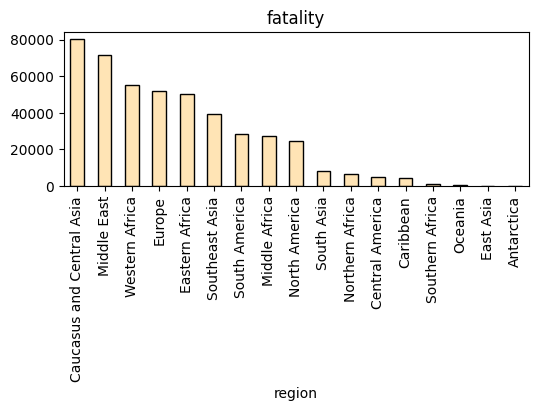

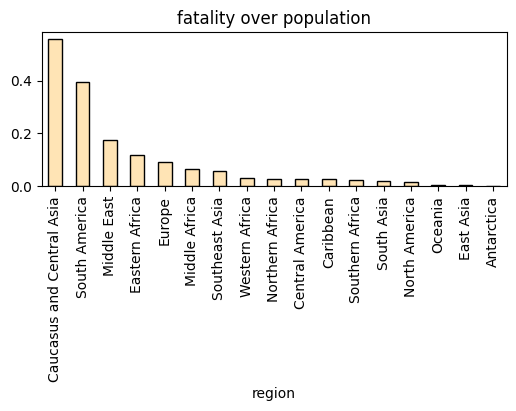

In [5]:
reg = reg.sort_values(ascending=False)
reg.plot(kind='bar', y=1,title="fatality", figsize=(6,2), color='moccasin', edgecolor='k', legend=False)
plt.show()
pop=[144,411,1900,579,422.5,687,72,430.5,1693.4,477,258.55,194.1,185.5,44.5,70,44,0.003]
frac=reg/pop/1000
frac=frac.sort_values(ascending=False)
#frac=frac.drop(labels='Antarctica')
frac.plot(kind='bar', y=1, title="fatality over population", figsize=(6,2),color='moccasin', edgecolor='k', legend=False)
plt.show()

In [6]:
p_viol = df[df["disorder_type"]=="Political violence"]
dem = df[df["disorder_type"]=="Demonstrations"]
p_viol_dem = df[df["disorder_type"]=="Political violence; Demonstrations"]
strat_dev = df[df["disorder_type"]=="Strategic developments"]

In [7]:
import dataframe_image as dfi

for region in reg.index.tolist():
    df1 = df.loc[df["region"] == region]
    print(region)
    df2=df1.groupby(["disorder_type","event_type"])["fatalities"].sum().to_frame()
    display(df2)
    dfi.export(df2,"%s.png" %region)
    print("\n")

Caucasus and Central Asia


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              210
Political violence                 Battles                          59761
                                   Explosions/Remote violence       16822
                                   Riots                               57
                                   Violence against civilians        2625
Political violence; Demonstrations Protests                            66
Strategic developments             Strategic developments             610

C:\Program Files\Google\Chrome\Application\chrome.exe


Middle East


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              561
Political violence                 Battles                          42981
                                   Explosions/Remote violence       22154
                                   Riots                              142
                                   Violence against civilians        5221
Political violence; Demonstrations Protests                           100
Strategic developments             Strategic developments             443

C:\Program Files\Google\Chrome\Application\chrome.exe


Western Africa


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              279
Political violence                 Battles                          27195
                                   Explosions/Remote violence        8205
                                   Riots                              944
                                   Violence against civilians       18269
Political violence; Demonstrations Protests                            79
Strategic developments             Strategic developments              69

C:\Program Files\Google\Chrome\Application\chrome.exe


Europe


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                                2
Political violence                 Battles                          24172
                                   Explosions/Remote violence       26209
                                   Riots                               16
                                   Violence against civilians        1427
Political violence; Demonstrations Protests                             8
Strategic developments             Strategic developments             125

C:\Program Files\Google\Chrome\Application\chrome.exe


Eastern Africa


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              273
Political violence                 Battles                          28686
                                   Explosions/Remote violence        4990
                                   Riots                             1294
                                   Violence against civilians       14939
Political violence; Demonstrations Protests                           156
Strategic developments             Strategic developments             162

C:\Program Files\Google\Chrome\Application\chrome.exe


Southeast Asia


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              247
Political violence                 Battles                          23815
                                   Explosions/Remote violence        8057
                                   Riots                              225
                                   Violence against civilians        6528
Political violence; Demonstrations Protests                           381
Strategic developments             Strategic developments              64

C:\Program Files\Google\Chrome\Application\chrome.exe


South America


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              268
Political violence                 Battles                          12124
                                   Explosions/Remote violence         205
                                   Riots                              362
                                   Violence against civilians       15418
Political violence; Demonstrations Protests                            37
Strategic developments             Strategic developments              10

C:\Program Files\Google\Chrome\Application\chrome.exe


Middle Africa


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              263
Political violence                 Battles                          14097
                                   Explosions/Remote violence         503
                                   Riots                              866
                                   Violence against civilians       11295
Political violence; Demonstrations Protests                           144
Strategic developments             Strategic developments             129

C:\Program Files\Google\Chrome\Application\chrome.exe


North America


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                               70
Political violence                 Battles                           4183
                                   Explosions/Remote violence           7
                                   Riots                              153
                                   Violence against civilians       19886
Political violence; Demonstrations Protests                             7
Strategic developments             Strategic developments              83

C:\Program Files\Google\Chrome\Application\chrome.exe


South Asia


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                              144
Political violence                 Battles                           3917
                                   Explosions/Remote violence        1026
                                   Riots                             1383
                                   Violence against civilians        1981
Political violence; Demonstrations Protests                            17
Strategic developments             Strategic developments              29

C:\Program Files\Google\Chrome\Application\chrome.exe


Northern Africa


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                               50
Political violence                 Battles                           4126
                                   Explosions/Remote violence         836
                                   Riots                               53
                                   Violence against civilians        1642
Political violence; Demonstrations Protests                           158
Strategic developments             Strategic developments              13

C:\Program Files\Google\Chrome\Application\chrome.exe


Central America


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                                3
Political violence                 Battles                           1599
                                   Explosions/Remote violence           1
                                   Riots                               49
                                   Violence against civilians        3381
Political violence; Demonstrations Protests                             0
Strategic developments             Strategic developments               0

C:\Program Files\Google\Chrome\Application\chrome.exe


Caribbean


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                               39
Political violence                 Battles                           1860
                                   Riots                              144
                                   Violence against civilians        2631
Political violence; Demonstrations Protests                            11
Strategic developments             Strategic developments               0

C:\Program Files\Google\Chrome\Application\chrome.exe


Southern Africa


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                               91
Political violence                 Battles                             38
                                   Explosions/Remote violence           3
                                   Riots                              537
                                   Violence against civilians         354
Political violence; Demonstrations Protests                            21
Strategic developments             Strategic developments               2

C:\Program Files\Google\Chrome\Application\chrome.exe


Oceania


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                                0
Political violence                 Battles                            167
                                   Explosions/Remote violence           3
                                   Riots                               87
                                   Violence against civilians         138
Political violence; Demonstrations Protests                             4
Strategic developments             Strategic developments               2

C:\Program Files\Google\Chrome\Application\chrome.exe


East Asia


fatalities
disorder_type                      event_type                            
Demonstrations                     Protests                             0
                                   Riots                                0
Political violence                 Battles                              6
                                   Explosions/Remote violence           6
                                   Riots                                0
                                   Violence against civilians          83
Political violence; Demonstrations Protests                             0
Strategic developments             Strategic developments              27

C:\Program Files\Google\Chrome\Application\chrome.exe


Antarctica


,,fatalities
disorder_type,event_type,
Demonstrations,Protests,0


C:\Program Files\Google\Chrome\Application\chrome.exe




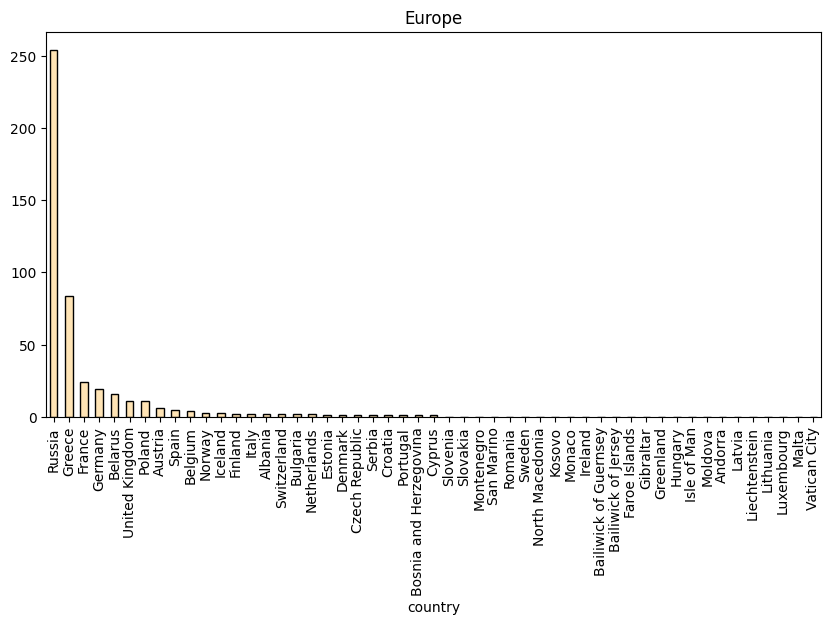

In [43]:
df1 = df[["country","fatalities"]]
df1 = df.loc[df["region"] == "Europe"]
df1 = df1.groupby(["country"])["fatalities"].sum()
df1 = df1.sort_values(ascending=False)
df1=df1.drop("Ukraine")
df1.plot(kind='bar', y=1, title="Europe", figsize=(10,5), color='moccasin', edgecolor='k', legend=False)
#plt.tight_layout()
plt.show()

In [30]:
df1

country
Ukraine                   51499
Russia                      254
Greece                       84
France                       24
Germany                      19
Belarus                      16
United Kingdom               11
Poland                       11
Austria                       6
Spain                         5
Belgium                       4
Norway                        3
Iceland                       3
Finland                       2
Italy                         2
Albania                       2
Switzerland                   2
Bulgaria                      2
Netherlands                   2
Estonia                       1
Denmark                       1
Czech Republic                1
Serbia                        1
Croatia                       1
Portugal                      1
Bosnia and Herzegovina        1
Cyprus                        1
Slovenia                      0
Slovakia                      0
Montenegro                    0
San Marino                    0


In [45]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 21.9/21.9 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
uvicorn 0.13.4 requires click==7.*, but you have click 8.1.3 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


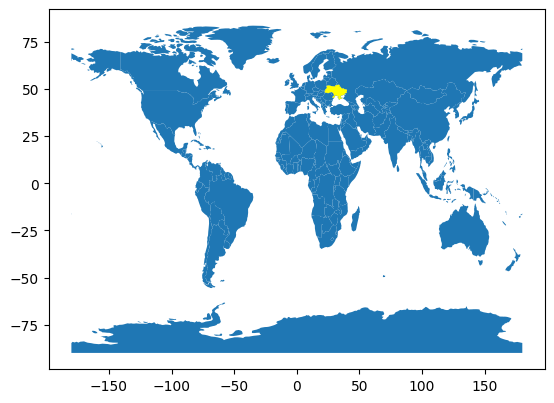

In [46]:
import matplotlib.pyplot as plt
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot()

world[world.name == 'Ukraine'].plot(color='yellow',ax=ax)

plt.show()